### ML for Security. Лабораторная №1

Пчелкина Ю.Ж. (группа 6231-010402D)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


In [3]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv('features_train.csv')
df.shape

(2400, 20)

In [8]:
cl = pd.read_csv('classes_train.csv')
cl.shape

(2400, 1)

In [9]:

# последним столбцом добавляем метки классов, удаляем бинарные признаки
df1 = df.copy()
df1['is_bot'] = pd.Series(cl['is_bot'], index = df1.index)

df1.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


In [10]:
# проверяем пропущенные значения
df1.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

Визуализация кореллированности признаков.

In [11]:
# sns.pairplot(df1, hue = 'is_bot')

<AxesSubplot:>

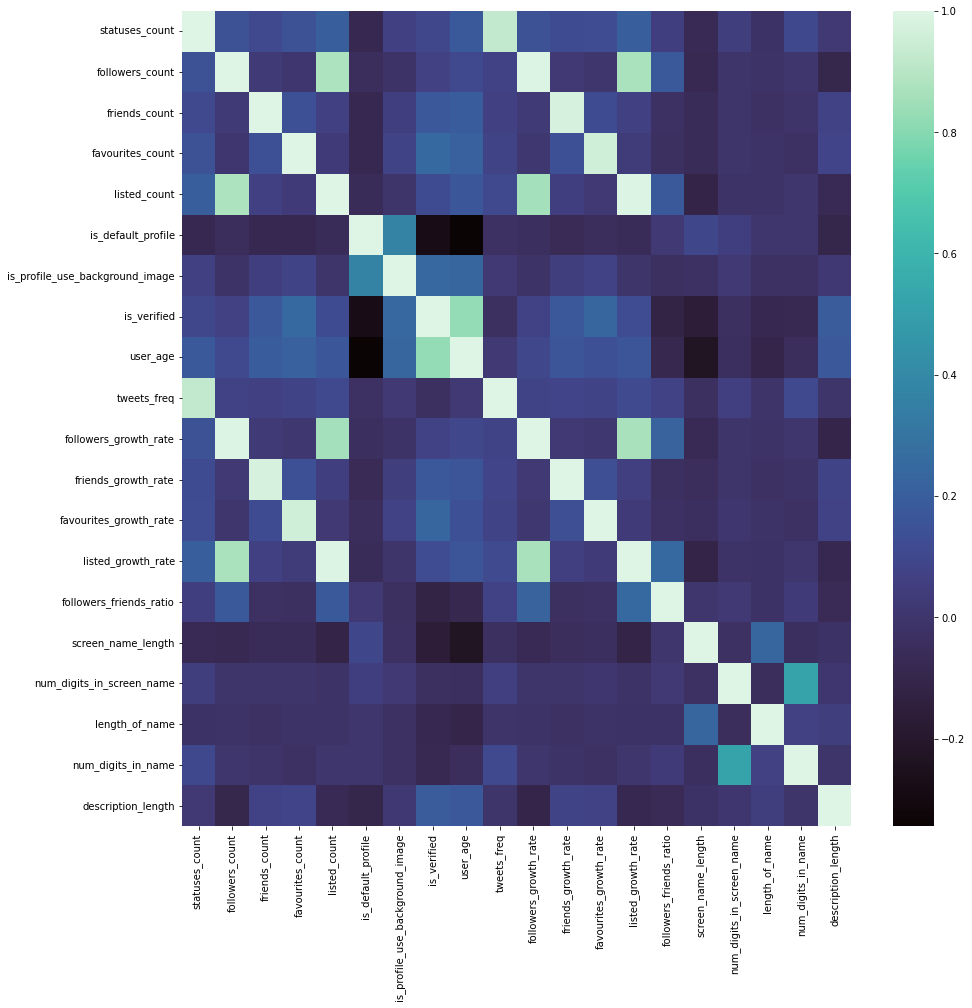

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap = "mako")

In [13]:
# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot

In [14]:
# поделили на обучающую и тестовую выборки 1:3
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [15]:
X_train.shape, X_test.shape

((1800, 20), (600, 20))

In [16]:
len(Y_train), len(Y_test)

(1800, 600)

#### 1.1  Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

F-мера (average = 
- binary - результаты только для класса, указанного параметром pos_label
- micro - глобально, подсчитывая общее количество истинных срабатываний, ложноотрицательных и ложноположительных результатов
- macro - для каждой метки, находит их невзвешенное среднее значение
- weighted - для каждой метки, находит их взвешенное среднее значение  

In [17]:
# для сравнения значений F-меры
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

Логистическая регрессия

In [21]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [23]:
# обучение

model_Log = LogisticRegression()
    
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(Y_test, Y_Log, average = "weighted")

K-соседей

In [24]:
# Стандартизируем данные

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [25]:
# обучение

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(Y_test, Y_KNN, average = "weighted")

DecisionTreeClassifier

In [26]:
# Стандартизируем данные

DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

In [27]:
# обучение

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

F_measure['DecisionTreeClassifier'] = f1_score(Y_test, Y_DTC, average = "weighted")

RandomForestClassifier

In [28]:
# Стандартизируем данные

RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [29]:
# обучение

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(Y_test, Y_RFC, average = "weighted")

In [30]:
maxim = 0

for i, j in F_measure.items():

    if j > maxim:
        maxim = j
        model_max = i
print ('Наибольшее значение F-меры:', maxim, '.  Модель:', model_max)


Наибольшее значение F-меры: 0.9966666666666667 .  Модель: LogisticRegression


#### 2.1. Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.

#### 2.1.1 Отбор наиболее информативных признаков для различных моделей при помощи графика с важностью коэфициентов

In [31]:
# Функция для вывода графика с важностью коэфициентов при соответствующих признаках

def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')


Линейная регрессия

In [32]:
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

      importance                        attribute
7  -8.955189e-01                      is_verified
13 -9.621046e-02               listed_growth_rate
11 -2.185308e-02              friends_growth_rate
16 -1.262508e-02        num_digits_in_screen_name
6  -6.866026e-03  is_profile_use_background_image
12 -3.157311e-03           favourites_growth_rate
15 -3.771043e-04               screen_name_length
17 -3.357340e-04                   length_of_name
8  -3.042522e-05                         user_age
19 -2.958058e-05               description_length
1  -3.183036e-08                  followers_count
0   3.938367e-08                   statuses_count
14  7.486098e-08          followers_friends_ratio
3   7.710196e-07                 favourites_count
2   5.167443e-06                    friends_count
4   1.958196e-05                     listed_count
18  7.766610e-05               num_digits_in_name
10  1.467319e-04            followers_growth_rate
9   2.275422e-04                      tweets_freq


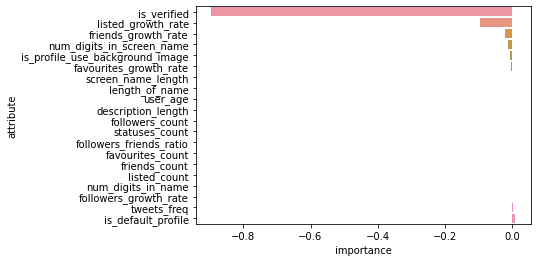

In [33]:
barh_plot(model_regress, X_train)

Модель Lasso

In [34]:
model_lasso = Lasso()
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

      importance                        attribute
8  -2.879077e-04                         user_age
3  -1.558882e-06                 favourites_count
2  -7.663600e-07                    friends_count
1  -3.392450e-08                  followers_count
9  -0.000000e+00                      tweets_freq
17 -0.000000e+00                   length_of_name
16 -0.000000e+00        num_digits_in_screen_name
15 -0.000000e+00               screen_name_length
13 -0.000000e+00               listed_growth_rate
12 -0.000000e+00           favourites_growth_rate
11 -0.000000e+00              friends_growth_rate
19 -0.000000e+00               description_length
18  0.000000e+00               num_digits_in_name
7  -0.000000e+00                      is_verified
6  -0.000000e+00  is_profile_use_background_image
5   0.000000e+00               is_default_profile
10 -0.000000e+00            followers_growth_rate
14  4.433575e-07          followers_friends_ratio
0   6.044801e-07                   statuses_count


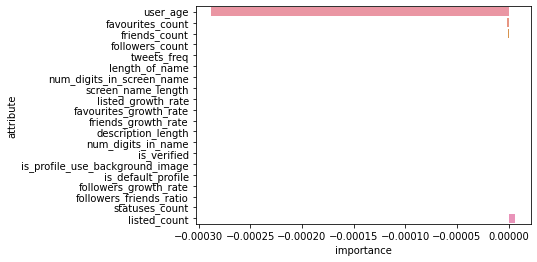

In [35]:
barh_plot(model_lasso, X_train)

Модель Ridge

In [36]:
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

      importance                        attribute
7  -8.951533e-01                      is_verified
13 -9.510712e-02               listed_growth_rate
11 -2.189746e-02              friends_growth_rate
16 -1.262239e-02        num_digits_in_screen_name
6  -6.885744e-03  is_profile_use_background_image
12 -3.176130e-03           favourites_growth_rate
15 -3.788321e-04               screen_name_length
17 -3.356178e-04                   length_of_name
8  -3.053554e-05                         user_age
19 -2.968641e-05               description_length
1  -3.089191e-08                  followers_count
0   3.953364e-08                   statuses_count
14  7.401649e-08          followers_friends_ratio
3   7.755259e-07                 favourites_count
2   5.177567e-06                    friends_count
4   1.934439e-05                     listed_count
18  8.468326e-05               num_digits_in_name
10  1.425902e-04            followers_growth_rate
9   2.276151e-04                      tweets_freq


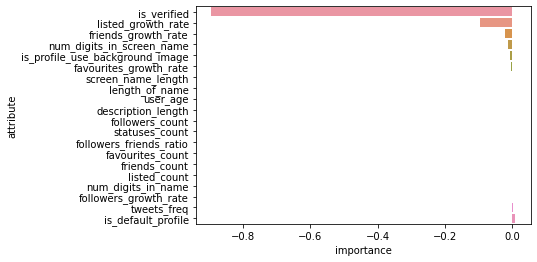

In [37]:
barh_plot(model_ridge, X_train)

Модель ElasticNet

In [38]:
model_elastic = ElasticNet()

In [39]:
model_elastic.fit(X_train, Y_train)
pred_train = model_elastic.predict(X_train)
pred_test = model_elastic.predict(X_test)

      importance                        attribute
10 -5.600938e-04            followers_growth_rate
8  -2.876259e-04                         user_age
19 -5.903479e-05               description_length
3  -1.530950e-06                 favourites_count
2  -6.811206e-07                    friends_count
17 -0.000000e+00                   length_of_name
16 -0.000000e+00        num_digits_in_screen_name
15 -0.000000e+00               screen_name_length
13 -0.000000e+00               listed_growth_rate
12 -0.000000e+00           favourites_growth_rate
11 -0.000000e+00              friends_growth_rate
9  -0.000000e+00                      tweets_freq
7  -0.000000e+00                      is_verified
6  -0.000000e+00  is_profile_use_background_image
5   0.000000e+00               is_default_profile
18  0.000000e+00               num_digits_in_name
1   9.651121e-08                  followers_count
14  5.615177e-07          followers_friends_ratio
0   5.984563e-07                   statuses_count


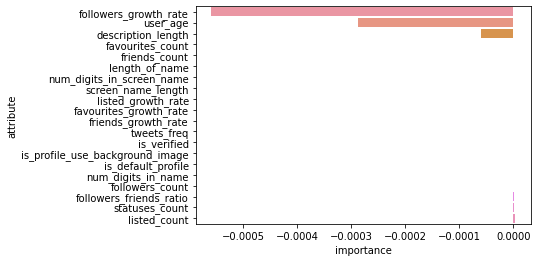

In [40]:
barh_plot(model_elastic, X_train)

Убираем 10 наименее информативных

In [41]:
df_new = df1.drop('is_verified', axis=1)
df_new = df_new.drop('user_age', axis=1)
df_new = df_new.drop('description_length', axis=1)
df_new = df_new.drop('listed_growth_rate', axis=1)
df_new = df_new.drop('friends_growth_rate', axis=1)
df_new = df_new.drop('num_digits_in_screen_name', axis=1)
df_new = df_new.drop('is_profile_use_background_image', axis=1)
df_new = df_new.drop('favourites_growth_rate', axis=1)
df_new = df_new.drop('screen_name_length', axis=1)
df_new = df_new.drop('length_of_name', axis=1)

df_new.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,tweets_freq,followers_growth_rate,followers_friends_ratio,num_digits_in_name,is_bot
0,5124,6641,3074,13768,126,0,1.890077,2.449650,2.160377,0,0
1,10672,8465,1575,4561,191,0,2.412297,1.913427,5.374603,0,0
2,704,3108,454,2400,77,0,0.518409,2.288660,6.845815,0,0
3,6091,304528,526,599,1515,0,1.445420,72.265781,578.950570,0,0
4,12967,13693,204,1177,452,0,4.052187,4.279063,67.122549,0,0


<AxesSubplot:>

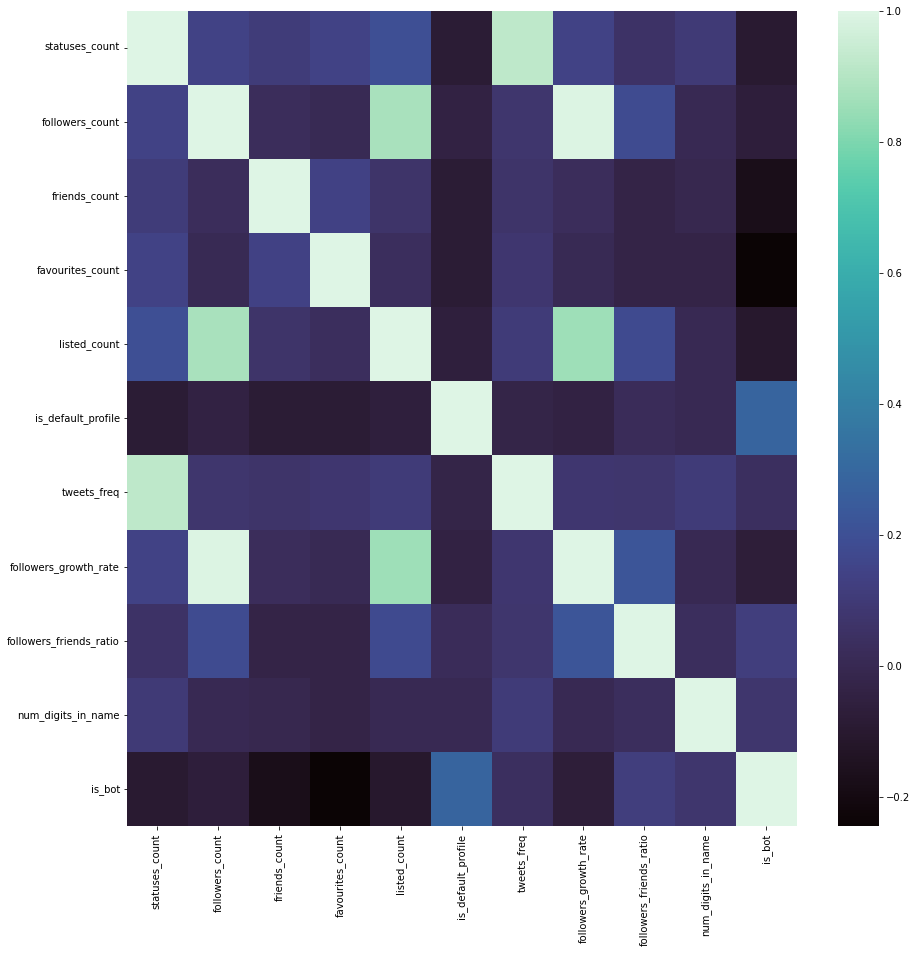

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_new.corr(), cmap = "mako")

#### 2.1.2 Отбор наиболее информативных признаков при помощи SelectKBest и Extra Tree Classifier

In [43]:
# При помощи SelectKBest. DataFrame с признаками и их информативностью, отсортированный по убыванию
K = 20
best_features1 = SelectKBest(score_func=chi2, k=K)
fit = best_features1.fit(X.values, Y.values)
best_features1 = pd.DataFrame(data=fit.scores_, index = X.columns, columns=['chi2_score'])
best_features1['number'] = pd.Series(range(X.shape[1]), index = best_features1.index)
sel_best = best_features1.nlargest(K, 'chi2_score')
sel_best.head()

,chi2_score,number
followers_count,6.568911e+07,1
followers_friends_ratio,9.749806e+06,14
favourites_count,8.109731e+06,3
statuses_count,2.747301e+06,0
friends_count,1.388549e+06,2


In [44]:
# При помощи ExtraTreesClassifier. DataFrame с признаками и их информативностью, отсортированный по убыванию
model2 = ExtraTreesClassifier()
model2 = model2.fit(X.values, Y.values.ravel())
best_features2 = pd.DataFrame(data = model2.feature_importances_, index = X.columns, columns=['feature_importance'])
best_features2['number'] = pd.Series(range(X.shape[1]), index = best_features2.index)
ex_trees = best_features2.nlargest(K, 'feature_importance')
ex_trees.head()

,feature_importance,number
is_verified,0.636769,7
user_age,0.168507,8
is_profile_use_background_image,0.034982,6
is_default_profile,0.031551,5
friends_growth_rate,0.020664,11


In [45]:
# Отбираем лучшие по обоим методам
list_best_number = []
for i in sel_best['number']:
    for j in ex_trees['number']:
        if i == j:
            list_best_number.append(i)

In [46]:
# оставим 10 лучших
list_bad = list_best_number[10:]
list_bad

[7, 11, 9, 5, 13, 6, 15, 18, 17, 16]

In [47]:
df_best = df1.copy()
df_best = df_best.drop(df_best.columns[list_bad], axis = 1)

In [48]:
df_best.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,user_age,followers_growth_rate,favourites_growth_rate,followers_friends_ratio,description_length,is_bot
0,5124,6641,3074,13768,126,2711,2.449650,5.078569,2.160377,73,0
1,10672,8465,1575,4561,191,4424,1.913427,1.030967,5.374603,142,0
2,704,3108,454,2400,77,1358,2.288660,1.767305,6.845815,90,0
3,6091,304528,526,599,1515,4214,72.265781,0.142145,578.950570,51,0
4,12967,13693,204,1177,452,3200,4.279063,0.367812,67.122549,106,0


<AxesSubplot:>

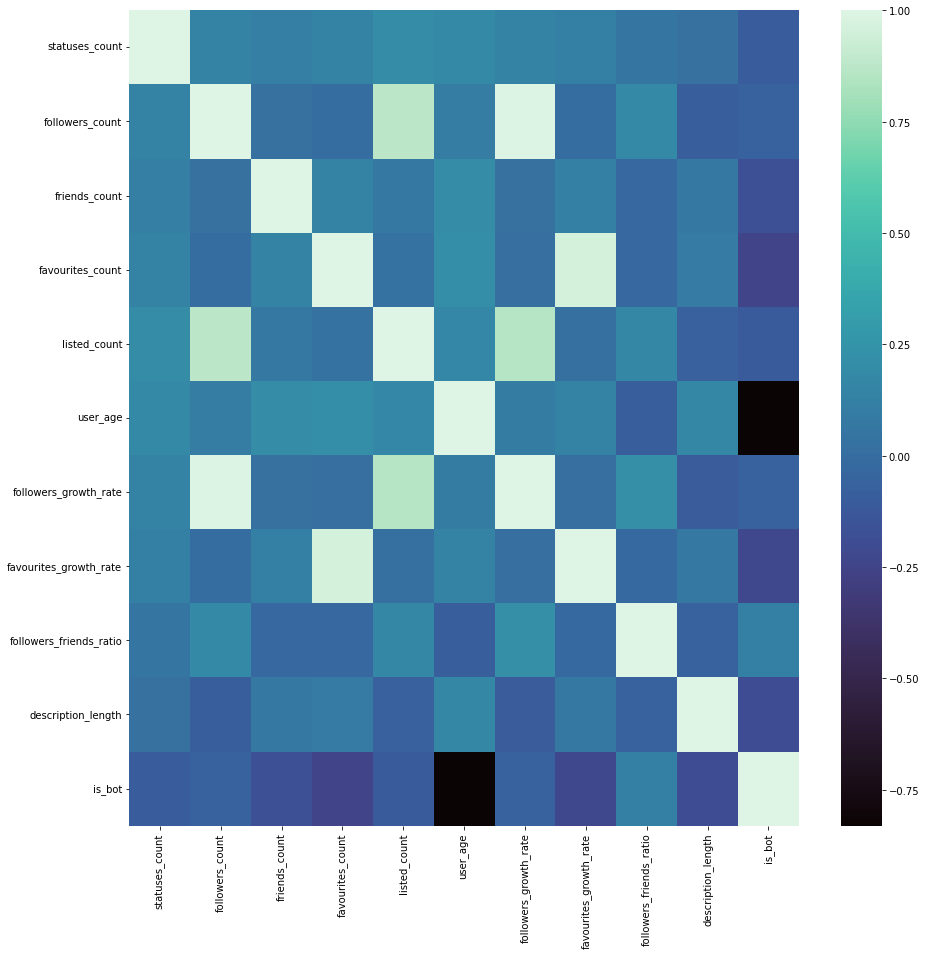

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_best.corr(), cmap = "mako")

In [50]:
#sns.pairplot(df_best, hue = 'is_bot')

#### 2.2. Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения.

Метрики:


Accuracy = (TP + TN)/(TP + TN + FP + FN)

Precision = TP/(TP + FP)

Recall =  TP/(TP + FN)


Можно через матрицу ошибок:


- TP (true positive, истинно положительные, объект верно отнесён к данному классу) - сумма диагональных элементов
- FP (false positive, ложно положительные, объект неверно отнесён к данному классу) - это сумма соответствующего столбца, за вычетом диагонального элемента
- TN (true negative, истинно отрицательные, верно определено, что объект не принадлежит к данному классу) - удалить соответствующие столбец и строку из матрицы, а затем суммировать все остальные элементы
- FN (false negative, ложно отрицательные, неверно определено, что объект не принадлежит к данному классу) - сумму соответствующей строки, за вычетом диагонального элемента


- Ложное обнаружение - ошибка 1 рода (Type I Error) - объект ошибочно относится к положительному классу ( = FP / количество в тестовой выборке).

- Пропуск бота - ошибка 2 рода (Type II Error) - объект ошибочно относится к отрицательному классу ( = FN / количество в тестовой выборке).



In [51]:
# для сравнения ошибок первого и второго рода
Error_I = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }


Error_II = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

In [52]:
# Работаем с наиболее "информативными" признаками
X = df_best.drop('is_bot', axis = 1)
Y = df_best.is_bot

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [54]:
# количество в тестовой выборке
M = Y_test.shape[0]

In [55]:
# расчет метрик по матрице ошибок

def Metrics (conf_mat):
    Metrics_list = []
    num_classes = 2
    
    TP = sum(np.diag(conf_mat))
        
    FP_val = []
    for i in range(num_classes):    
        FP_val.append(sum(conf_mat[:,i]) - conf_mat[i,i])
    FP = sum(FP_val)
    
    TN_val = []
    for i in range(num_classes):
        # удаляем i-ю строку
        new_matr = np.delete(conf_mat, i, 0)
        # удаляем i-й столбец
        new_matr = np.delete(new_matr, i, 1)
        TN_val.append(sum(sum(new_matr)))    
    TN = sum(TN_val)
    
    FN_val = []
    for i in range(num_classes):
        FN_val.append(sum(conf_mat[i,:]) - conf_mat[i,i])
    FN = (sum(FN_val))
    
    accur =  (TP+TN)/(TP+TN+FP+FN)
    
    Metrics_list.append(TP)
    Metrics_list.append(FP)
    Metrics_list.append(TN)
    Metrics_list.append(FN)
    Metrics_list.append(accur)
    
    return Metrics_list

Логистическая регрессия

In [63]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [64]:
# обучение

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

In [65]:
conf_mat_Log = confusion_matrix(Y_test, Y_Log)
Error_I['LogisticRegression'] = Metrics (conf_mat_Log)[1] / M
Error_II['LogisticRegression'] = Metrics (conf_mat_Log)[3] / M

K-соседей

In [66]:
# Стандартизируем данные

KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [67]:
# С помощью GridSearchCV производим подбор гиперпараметров:
# n_neighbors - это количество соседей, которые нужно использовать, 
# weights - весовая функция,используемая при прогнозировании
# algorithm - алгоритм, используемый для вычисления ближайших соседей


params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN.fit(X_train, Y_train)

grid_search_KNN.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}

In [68]:
# Обучаем модель с лучшими параметрами

model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

In [69]:
conf_mat_KNN = confusion_matrix(Y_test, Y_KNN)
Error_I['KNeighborsClassifier'] = Metrics (conf_mat_KNN)[1] / M
Error_II['KNeighborsClassifier'] = Metrics (conf_mat_KNN)[3] / M

Дерево решений

In [70]:
# Стандартизируем данные

DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

In [71]:
# Подбираем гиперпараметры

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy']}

grid_search_DTC = GridSearchCV(pipe_DTC, params_DTC)
grid_search_DTC.fit(X_train, Y_train)
grid_search_DTC.best_params_


{'DTC__criterion': 'gini', 'DTC__max_depth': 4, 'DTC__splitter': 'best'}

In [72]:
# Обучаем модель с лучшими параметрами

model_DTC = DecisionTreeClassifier(max_depth = grid_search_DTC.best_params_['DTC__max_depth'], 
                                 splitter = grid_search_DTC.best_params_['DTC__splitter'], 
                                 criterion = grid_search_DTC.best_params_['DTC__criterion'])
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

In [73]:
conf_mat_DTC = confusion_matrix(Y_test, Y_DTC)
Error_I['DecisionTreeClassifier'] = Metrics (conf_mat_DTC)[1] / M
Error_II['DecisionTreeClassifier'] = Metrics (conf_mat_DTC)[3] / M

Случайный лес

In [74]:
# Стандартизируем данные

RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [75]:
#Подбираем гиперпараметры

params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC.fit(X_train, Y_train)
grid_search_RFC.best_params_

{'RFC__criterion': 'gini', 'RFC__n_estimators': 91}

In [76]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

In [77]:
conf_mat_RFC = confusion_matrix(Y_test, Y_RFC)
Error_I['RandomForestClassifier'] = Metrics (conf_mat_RFC)[1] / M
Error_II['RandomForestClassifier'] = Metrics (conf_mat_RFC)[3] / M

Сравниваем значения ошибок первого и второго рода у различных моделей

In [78]:
Error_II

{'LogisticRegression': 0.016666666666666666,
 'KNeighborsClassifier': 0.015,
 'DecisionTreeClassifier': 0.013333333333333334,
 'RandomForestClassifier': 0.011666666666666667}

Ошибка II рода ни в одном случае не превышает 0,03

In [79]:
minim = 1

for i, j in Error_I.items():
    if j < minim:
        minim = j
        model_min = i
print ('Наименьшая ошибка первого рода:', minim, '.  Модель:', model_min)


Наименьшая ошибка первого рода: 0.011666666666666667 .  Модель: RandomForestClassifier


In [80]:
report_RFC = classification_report(Y_test, Y_RFC)
print(report_RFC)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       447
           1       0.99      0.97      0.98       153

    accuracy                           0.99       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.99      0.99       600

